# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [148]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [149]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


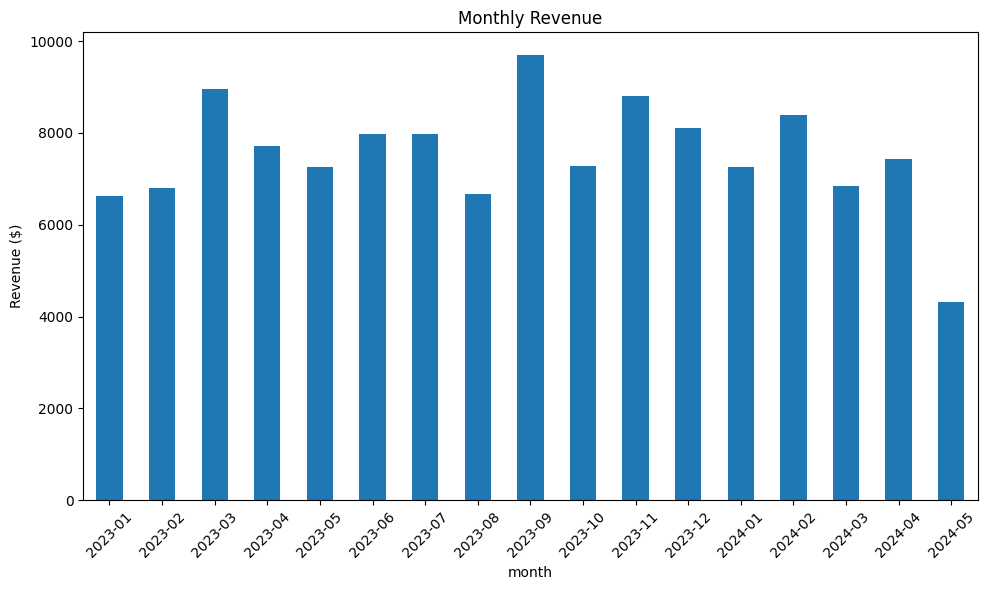

In [150]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [151]:
# latest month is May 2025 which is part of this quarter
# assuming last quarter is January to March 2024 --> we will filter for that
last_quarter = data[(data["order_date"] >= "2023-01-01") & (data["order_date"] <= "2023-03-31")]

# revenue by month in last quarter
last_quarter_rev = last_quarter.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(last_quarter_rev)

# total revenue in last quarter
print('\nTotal revenue last quarter: ', float(last_quarter_rev.sum()))

Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
Freq: M, Name: revenue, dtype: float64

Total revenue last quarter:  22382.79


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [152]:
# these are our top spenders --> customer_id 62 spent the most
customer_revenue = data.groupby("customer_id")["revenue"].sum()
top_5_customers = customer_revenue.sort_values(ascending=False).head(5)
print("Top 5 customers:")
top_5_customers


Top 5 customers:


customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [153]:
segment_avg_revenue = data.groupby("customer_segment")["revenue"].mean().round(2)

print("Seniors have the highest average revenue per order but not by a significant amount.")

segment_avg_revenue

Seniors have the highest average revenue per order but not by a significant amount.


customer_segment
Professional    255.65
Senior          262.13
Student         253.81
Name: revenue, dtype: float64

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [154]:
print("The region with both highest total revenue and average order size is South.")
region_summary = (data.groupby("region")["revenue"].agg(total_revenue="sum", avg_order_size="mean")
                  .sort_values("total_revenue", ascending=False))
region_summary


The region with both highest total revenue and average order size is South.


,total_revenue,avg_order_size
region,,
South,34839.45,274.326378
North,34351.69,258.283383
East,31221.80,240.167692
West,27727.73,252.070273


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [155]:
# Home is most popular by both category and revenue
category_summary = data.groupby("product_category").agg(
    total_quantity=("quantity", "sum"),  
    total_revenue=("revenue", "sum"),  
)

category_summary


,total_quantity,total_revenue
product_category,,
Books,227,24046.06
Clothing,253,24804.57
Electronics,239,25498.31
Home,269,29871.47
Sports,246,23920.26


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [156]:
# trying to seperate discounted vs non-discounted orders
print('Discounted orders did indeed have higher revenue than non-discounted orders')
data["is_discounted"] = data["discount_applied"] > 0
discounted_revenue = data.groupby("is_discounted")["revenue"].agg(["mean", "median"])
discounted_revenue

Discounted orders did indeed have higher revenue than non-discounted orders


,mean,median
is_discounted,,
False,248.296337,178.98
True,263.831362,219.24


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [157]:
print('There does not appear to be a significant difference in revenue by payment method. The are fairly distributed.\n')
print(data["payment_method"].value_counts(normalize=True) * 100)

data.groupby("payment_method")["revenue"].agg(["mean", "median", "count"]).sort_values(
    "mean", ascending=False
)


There does not appear to be a significant difference in revenue by payment method. The are fairly distributed.

payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64


,mean,median,count
payment_method,,,
Debit Card,275.980650,234.160,123
Credit Card,257.444234,186.630,137
Gift Card,254.362500,215.750,124
PayPal,236.071034,164.945,116


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Weekends are not busier than weekdays because each day have roughly the same number of orders.



<Axes: title={'center': 'Number of Orders by Day of Week'}, xlabel='day_of_week', ylabel='Number of Orders'>

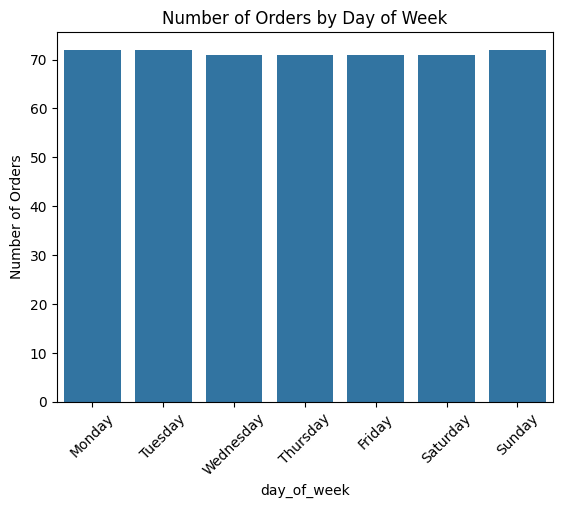

In [158]:
print('Weekends are not busier than weekdays because each day have roughly the same number of orders.\n')
orders_by_day = data.groupby("day_of_week")["order_id"].count()

# putting in orders by day
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
orders_by_day = orders_by_day.reindex(weekdays)
plt.xticks(rotation=45)
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Day of Week")

sns.barplot(x=orders_by_day.index, y=orders_by_day.values)



### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [159]:
# creating new column for profit
data['profit'] = data['revenue'] * 0.2
total_profit = float(data['profit'].sum().round(2))
print('The total profit so far is $', total_profit)

The total profit so far is $ 25628.13


In [160]:
# most profitable region --> should be south since it has highest revenue
print('The most profitable region is South.\n')
data.groupby("region")["profit"].sum().sort_values(ascending=False)


The most profitable region is South.



region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

My recommendatons: There are a couple of strategies that this conmpany can do. First, since the Southern region tends to create more revenue and profit [profit is \$6,967.89], they can focus a bit more attention to them. 

One way to do so is through discounted prices because discounted orders had a higher average and median revenue 
than non-discounted [\$219.24 vs \$178.98]. 

It can be applied to people who spend a lot becasue there is a create disparity from the top 5 spenders vs top 5 lowest spenders [\$4,448.39 vs \$124.78].

This can also encourage low spenders to spend more money to buy products especially during the month of September and Novemeber since those were some of the peak monthly revenue in 2023. 

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.